<a href="https://colab.research.google.com/github/stuarstuar/Memory-Drug-Test/blob/main/Memory_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Blabla

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/LabTIC/


/content/gdrive/MyDrive/LabTIC


In [ ]:
# Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

https://www.kaggle.com/datasets/steveahn/memory-test-on-drugged-islanders-data

## Pandas Profiling 


In [ ]:
pip uninstall pandas_profiling


Found existing installation: pandas-profiling 1.4.1
Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1


In [ ]:
pip install pandas-profiling[notebook,yhtml]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 5.1 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 11.1 MB 49.5 MB/s 
     |████████████████████████████████| 690 kB 66.8 MB/s 
     |████████████████████████████████| 102 kB 11.0 MB/s 
     |████████████████████████████████| 596 kB 71.6 MB/s 
     |████████████████████████████████| 4.7 MB 56.1 MB/s 
     |████████████████████████████████| 812 kB 60.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=05b61e5fdf6eeb1a564c66e71e4e4af89a4085b30a0c402b0bd6ff52eab99cda
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=ccd63aad29252eaf084922cef

In [ ]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file


In [ ]:
# Extracting data

data_memory = pd.read_csv('Islander_data.csv')

#data_memory.head()
#data_memory.describe()
data_memory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   first_name        198 non-null    object 
 1   last_name         198 non-null    object 
 2   age               198 non-null    int64  
 3   Happy_Sad_group   198 non-null    object 
 4   Dosage            198 non-null    int64  
 5   Drug              198 non-null    object 
 6   Mem_Score_Before  198 non-null    float64
 7   Mem_Score_After   198 non-null    float64
 8   Diff              198 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.0+ KB


In [ ]:
profile = ProfileReport(data_memory, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Graphs


In [ ]:
# Sería interesante diferenciarlo por sexo pero no está hecho, esto se podría hacer viendo los nombres but...

#data_memory = data_memory.drop(['first_name','last_name'], axis=1)
data_memory.columns= ['Age','HSg','Dose','Drug','MSB','MSA','Diff']

data_memory.head()

# Igual se ve q en promedio les fue mejor despues, pero tiene mas desviación estandar
# Si la diff es + = Mejor Desps // - = Mejor Antes 



,Age,HSg,Dose,Drug,MSB,MSA,Diff
0,25,H,1,A,63.5,61.2,-2.3
1,52,S,1,A,41.6,40.7,-0.9
2,29,H,1,A,59.7,55.1,-4.6
3,50,S,1,A,51.7,51.2,-0.5
4,52,H,1,A,47.0,47.1,0.1


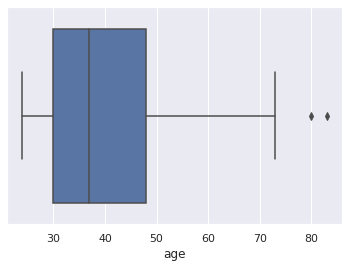

In [ ]:
# Solo numéricas como age, dosage (Es categorica nominal), msb,msa, diff

ax = sns.boxplot(x=data_memory["age"])


In [ ]:
def boxplot(variable_x,variable_y,data):

  sns.set_theme(style="whitegrid")
  sns.set(color_codes = True)
  fig = plt.figure(figsize = (10,5))
  ax = fig.add_axes([0,0,1,1])
  ax = sns.boxplot(x= variable_x, y=variable_y, data=data)
  plt.xticks(rotation='vertical')
  plt.title(variable_x.upper()+" v/s "+ variable_y.upper())



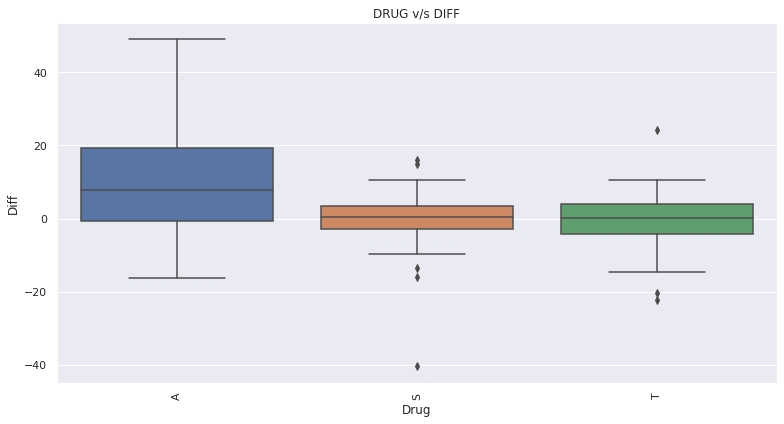

In [ ]:
boxplot("Drug","Diff",data_memory)

# Quiero hace uno q segemente por drogas y por dosis 


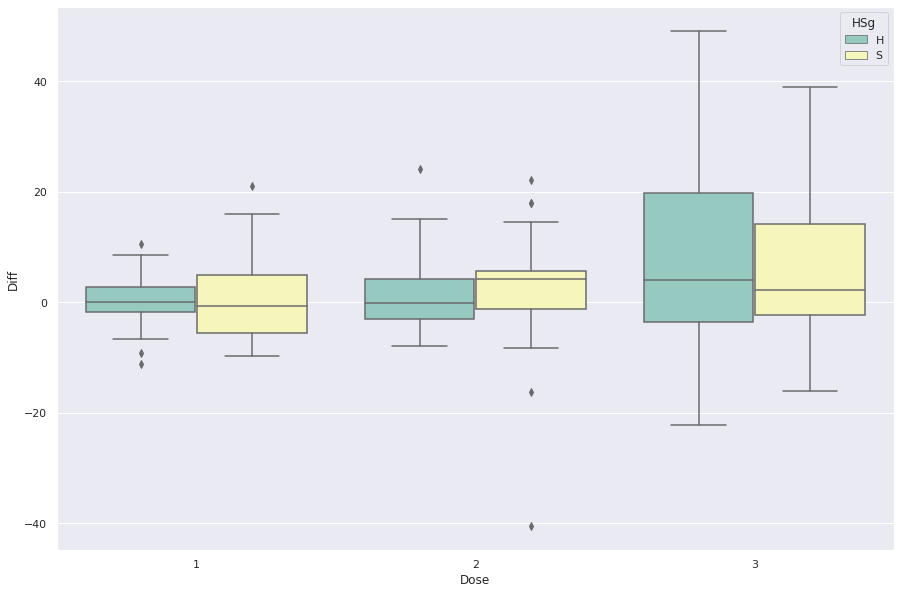

In [ ]:
# Hacer graficos de combinaciones 

fig = plt.figure(figsize = (15,10))
ax = sns.boxplot(x="Dose", y="Diff", hue="Drug",
                 data=data_memory, palette="Set3")

In [ ]:
# Será q justo los alprazolam se los dieron a los mas viejos?
# Se ordena por edad para saber si eso provoca la mayor dif 

# by_age = data_memory.sort_values('age',ascending=False)
by_age = data_memory.sort_values('Drug')
by_age[1:7]

# Justo hay una q si falla harto con A 

,Age,HSg,Dose,Drug,MSB,MSA,Diff
36,50,S,2,A,74.2,88.1,13.9
37,25,H,2,A,50.0,49.4,-0.6
38,29,S,2,A,84.4,96.0,11.6
39,35,S,2,A,40.8,63.0,22.2
40,26,H,2,A,87.0,102.0,15.0
41,51,H,2,A,46.5,50.8,4.3


In [ ]:
### Hay q hacer muchos graficos pero intentemos una regresion con dummy a lo loco



## Fallo 1


para luego hacer clusters

In [ ]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
# car_num_norm = mean_norm(car_num)


In [ ]:
mem_regr = data_memory.drop(['MSB','MSA'], axis=1)
mem_regr['Dose'] = mem_regr['Dose'].astype('object')

print(mem_regr)

     Age HSg Dose Drug  Diff
0     25   H    1    A  -2.3
1     52   S    1    A  -0.9
2     29   H    1    A  -4.6
3     50   S    1    A  -0.5
4     52   H    1    A   0.1
..   ...  ..  ...  ...   ...
193   52   H    3    T   3.0
194   41   S    3    T  -2.1
195   54   S    3    T   2.3
196   40   H    3    T   0.2
197   32   S    3    T  -1.0

[198 rows x 5 columns]


In [ ]:
x = mem_regr.drop(['Diff'], axis=1)
y = mem_regr['Diff']
x = pd.get_dummies(x)
x




,Age,HSg_H,HSg_S,Dose_1,Dose_2,Dose_3,Drug_A,Drug_S,Drug_T
0,25,1,0,1,0,0,1,0,0
1,52,0,1,1,0,0,1,0,0
2,29,1,0,1,0,0,1,0,0
3,50,0,1,1,0,0,1,0,0
4,52,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
193,52,1,0,0,0,1,0,0,1
194,41,0,1,0,0,1,0,0,1
195,54,0,1,0,0,1,0,0,1
196,40,1,0,0,0,1,0,0,1


## Fallo 2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size =0.2 ,random_state = 2)



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Regresión Multivariable Dummy


In [ ]:

data_memory = pd.read_csv('Islander_data.csv')
data_memory = data_memory.drop(['first_name','last_name'], axis=1)
data_memory.columns= ['Age','HSg','Dose','Drug','MSB','MSA','Diff']
data_memory['Dose'] = data_memory['Dose'].astype('object')
data_memory = data_memory.drop(['MSB','MSA'], axis=1)

data_memory = pd.get_dummies(data_memory)
data_memory = mean_norm(data_memory)

#data_memory.head()
#data_memory.describe()
data_memory.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     198 non-null    float64
 1   Diff    198 non-null    float64
 2   HSg_H   198 non-null    float64
 3   HSg_S   198 non-null    float64
 4   Dose_1  198 non-null    float64
 5   Dose_2  198 non-null    float64
 6   Dose_3  198 non-null    float64
 7   Drug_A  198 non-null    float64
 8   Drug_S  198 non-null    float64
 9   Drug_T  198 non-null    float64
dtypes: float64(10)
memory usage: 15.6 KB


In [ ]:
from pandas.core.frame import DataFrame
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sfm 
import statsmodels.api as sm

training_data, testing_data = train_test_split(data_memory, test_size=0.2, random_state=25)

x_train = training_data.drop(['Diff'], axis=1)
y_train = training_data['Diff']

x_test = testing_data.drop(['Diff'], axis=1)
y_test = testing_data['Diff']




print(training_data)

          Age      Diff     HSg_H     HSg_S    Dose_1    Dose_2    Dose_3  \
163  0.205413 -0.218934  0.997472 -0.997472 -0.713349  1.410638 -0.697319   
42   1.369838 -1.790354 -0.997472  0.997472 -0.713349  1.410638 -0.697319   
30   1.120318  0.199492 -0.997472  0.997472 -0.713349  1.410638 -0.697319   
193  1.037145  0.004227  0.997472 -0.997472 -0.713349 -0.705319  1.426822   
133 -0.210453 -0.274724 -0.997472  0.997472  1.394758 -0.705319 -0.697319   
..        ...       ...       ...       ...       ...       ...       ...   
118 -0.875839 -0.934906 -0.997472  0.997472 -0.713349 -0.705319  1.426822   
61  -0.459973  0.153000  0.997472 -0.997472 -0.713349 -0.705319  1.426822   
143 -0.210453 -1.185962 -0.997472  0.997472  1.394758 -0.705319 -0.697319   
62  -1.042186  0.283177 -0.997472  0.997472 -0.713349 -0.705319  1.426822   
132 -1.042186 -0.070160 -0.997472  0.997472 -0.713349 -0.705319  1.426822   

       Drug_A    Drug_S    Drug_T  
163 -0.713349 -0.705319  1.426822  
42 

In [ ]:
lm = sfm.ols(formula="Diff~ Age + HSg_H +HSg_S +Dose_1 + Dose_2 +Dose_3 +Drug_A +Drug_S +Drug_T",data=training_data).fit() 
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Diff   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     9.454
Date:                Wed, 25 May 2022   Prob (F-statistic):           8.26e-09
Time:                        21:36:03   Log-Likelihood:                -210.21
No. Observations:                 158   AIC:                             434.4
Df Residuals:                     151   BIC:                             455.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0313      0.075     -0.416      0.678      -0.180       0.118
Age           -0.0787      0.076     -1.035      0.302      -0.229       0.072
HSg_H         -0.0113      0.038     -0.301      0.764      -0.085       0.063
HSg_S          0.0113      0.038      0.301      0.764      -0.063       0.085
Dose_1        -0.1377      0.050     -2.765      0.006      -0.236      -0.039
Dose_2        -0.0486      0.051     -0.944      0.347      -0.150       0.053
Dose_3         0.1875      0.049      3.819      0.000       0.090       0.284
Drug_A         0.3144      0.049      6.387      0.000       0.217       0.412
Drug_S        -0.1636      0.053     -3.115      0.002      -0.267      -0.060
Drug_T        -0.1526      0.049     -3.090      0.002      -0.250      -0.055
==============================================================================
Omnibus:                       12.029   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.559
Skew:                          -0.186   Prob(JB):                     6.29e-07
Kurtosis:                       5.049   Cond. No.                     7.90e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.14e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

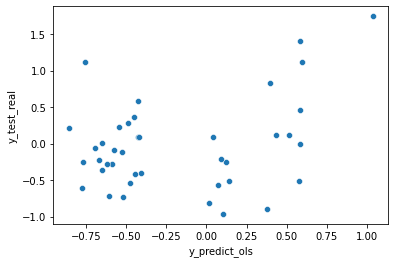

In [ ]:
predicts = pd.DataFrame()

predicts['y_test_real'] = y_test
predicts['y_predict_ols'] = lm.predict(x_test)
ax= sns.scatterplot(data=predicts, x="y_predict_ols", y="y_test_real")


La regresión lineal valió verga, veamos como se adecua con otros metodos

## PCA 2


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = data_memory[['Age' , 'HSg_H' ,'HSg_S' ,'Dose_1' , 'Dose_2' ,'Dose_3' ,'Drug_A' ,'Drug_S' ,'Drug_T']].dropna().values
x = StandardScaler().fit_transform(x)
y = data_memory['Diff']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2'])

finalDf = pd.concat([principalDf, y], axis = 1)

finalDf

,pca1,pca2,Diff
0,-1.342972,-0.110558,-0.488586
1,1.589095,0.468283,-0.358409
2,-1.326419,-0.016512,-0.702448
3,1.580819,0.421260,-0.321216
4,-1.231242,0.524249,-0.265425
...,...,...,...
193,-1.462702,1.263206,0.004227
194,1.312116,0.948615,-0.469989
195,1.365911,1.254262,-0.060862
196,-1.512360,0.981069,-0.256127


In [ ]:
pd.DataFrame(
    data    = pca.components_,
    columns = data_memory[['Age' , 'HSg_H' ,'HSg_S' ,'Dose_1' , 'Dose_2' ,'Dose_3' ,'Drug_A' ,'Drug_S' ,'Drug_T']].columns,
    index   = ['PC1', 'PC2'])

,Age,HSg_H,HSg_S,Dose_1,Dose_2,Dose_3,Drug_A,Drug_S,Drug_T
PC1,0.049627,-0.705084,0.705084,0.026576,0.001144,-0.027927,0.033947,-0.013454,-0.020699
PC2,0.281965,0.013992,-0.013992,-0.135976,0.202636,-0.066410,0.231206,-0.738036,0.507927


In [ ]:
pca.explained_variance_ratio_

array([0.22268638, 0.17170642])

In [ ]:
# -4,03 y 4,28 

# -4.5 , -2 = Mucho_Peor 
# -2,0 = Peor  
# 0,2 = Mejor_Igual
# 2,4,5 = Mejor

categories = pd.cut(x=finalDf['Diff'],
                     bins=[-4.5, -2, 0, 2,  4],
                     labels=['PM', 'P', 'MI','M'])

finalDf['Diffcat'] = categories.values
finalDf['Diffcat'] = finalDf['Diffcat'].astype('object')

finalDf

,pca1,pca2,Diff,Diffcat
0,-1.342972,-0.110558,-0.488586,P
1,1.589095,0.468283,-0.358409,P
2,-1.326419,-0.016512,-0.702448,P
3,1.580819,0.421260,-0.321216,P
4,-1.231242,0.524249,-0.265425,P
...,...,...,...,...
193,-1.462702,1.263206,0.004227,MI
194,1.312116,0.948615,-0.469989,P
195,1.365911,1.254262,-0.060862,P
196,-1.512360,0.981069,-0.256127,P


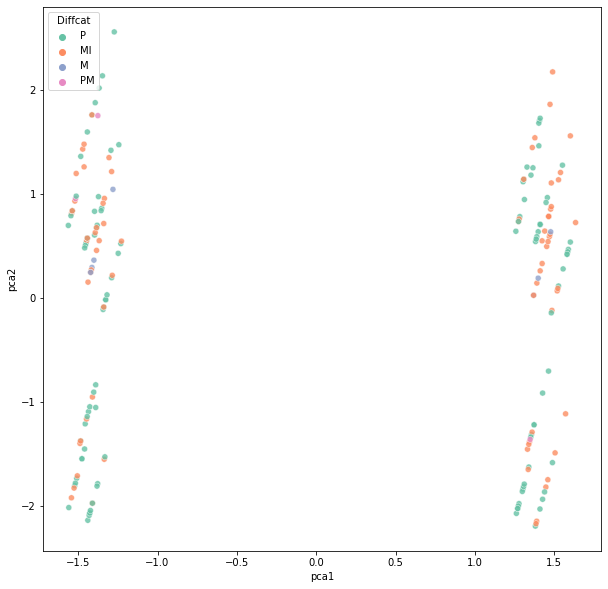

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=finalDf, x='pca1', y='pca2', hue='Diffcat', palette='Set2', alpha=0.8)


## PCA 3

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x = data_memory[['Age' , 'HSg_H' ,'HSg_S' ,'Dose_1' , 'Dose_2' ,'Dose_3' ,'Drug_A' ,'Drug_S' ,'Drug_T']].dropna().values
x = StandardScaler().fit_transform(x)
y = data_memory['Diff']

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2','pca3'])

finalDf = pd.concat([principalDf, y], axis = 1)
finalDf['Diffcat'] = categories.values
finalDf['Diffcat'] = finalDf['Diffcat'].astype('object')


finalDf

,pca1,pca2,pca3,Diff,Diffcat
0,-1.342972,-0.110558,2.399571,-0.488586,P
1,1.589095,0.468283,2.223091,-0.358409,P
2,-1.326419,-0.016512,2.391174,-0.702448,P
3,1.580819,0.421260,2.227289,-0.321216,P
4,-1.231242,0.524249,2.342893,-0.265425,P
...,...,...,...,...,...
193,-1.462702,1.263206,-0.693555,0.004227,MI
194,1.312116,0.948615,-0.790266,-0.469989,P
195,1.365911,1.254262,-0.817555,-0.060862,P
196,-1.512360,0.981069,-0.668365,-0.256127,P


In [ ]:
fig = px.scatter(finalDf, x='pca1', y='pca2', color='Diffcat',
                 width=700, height=500,
                 title="2D Scatter Plot")
fig.show()

In [ ]:
finalDf.dropna()
finalDf['Diffcat'] = categories.values
finalDf['Diffcat'] = finalDf['Diffcat'].dropna().astype('int')

fig = px.scatter_3d(finalDf, x='pca1', y='pca2', z='pca3',
              color='Diffcat')
fig.show()

## Cluster

In [ ]:
x2 = data_memory[['Age' , 'HSg_H' ,'HSg_S' ,'Dose_1' , 'Dose_2' ,'Dose_3' ,'Drug_A' ,'Drug_S' ,'Drug_T','Diff']].dropna().values
x2 = StandardScaler().fit_transform(x)




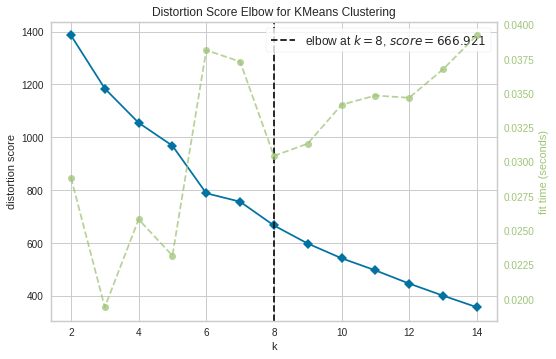

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

''' se usa el x creado para pca '''

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(x2)
visualizer.poof() 

In [ ]:
from sklearn.cluster import KMeans

df_cluster = data_memory[['Age' , 'HSg_H' ,'HSg_S' ,'Dose_1' , 'Dose_2' ,'Dose_3' ,'Drug_A' ,'Drug_S' ,'Drug_T','Diff']].dropna()

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(df_cluster)

pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_cluster['Clusters'] = predictions
df_cluster.head()

,Age,HSg_H,HSg_S,Dose_1,Dose_2,...,Drug_A,Drug_S,Drug_T,Diff,Clusters
0,-1.208532,0.997472,-0.997472,1.394758,-0.705319,...,1.394758,-0.705319,-0.697319,-0.488586,1
1,1.037145,-0.997472,0.997472,1.394758,-0.705319,...,1.394758,-0.705319,-0.697319,-0.358409,1
2,-0.875839,0.997472,-0.997472,1.394758,-0.705319,...,1.394758,-0.705319,-0.697319,-0.702448,1
3,0.870799,-0.997472,0.997472,1.394758,-0.705319,...,1.394758,-0.705319,-0.697319,-0.321216,1
4,1.037145,0.997472,-0.997472,1.394758,-0.705319,...,1.394758,-0.705319,-0.697319,-0.265425,1


In [ ]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_cluster)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,0.104555,-1.368459,1
1,0.116654,1.573706,1
2,0.007127,-1.351833,1
3,0.140034,1.564475,1
4,0.052391,-1.234289,1


In [ ]:
data_memory

,Age,Diff,HSg_H,HSg_S,Dose_1,Dose_2,Dose_3,Drug_A,Drug_S,Drug_T
0,-1.208532,-0.488586,0.997472,-0.997472,1.394758,-0.705319,-0.697319,1.394758,-0.705319,-0.697319
1,1.037145,-0.358409,-0.997472,0.997472,1.394758,-0.705319,-0.697319,1.394758,-0.705319,-0.697319
2,-0.875839,-0.702448,0.997472,-0.997472,1.394758,-0.705319,-0.697319,1.394758,-0.705319,-0.697319
3,0.870799,-0.321216,-0.997472,0.997472,1.394758,-0.705319,-0.697319,1.394758,-0.705319,-0.697319
4,1.037145,-0.265425,0.997472,-0.997472,1.394758,-0.705319,-0.697319,1.394758,-0.705319,-0.697319
...,...,...,...,...,...,...,...,...,...,...
193,1.037145,0.004227,0.997472,-0.997472,-0.713349,-0.705319,1.426822,-0.713349,-0.705319,1.426822
194,0.122239,-0.469989,-0.997472,0.997472,-0.713349,-0.705319,1.426822,-0.713349,-0.705319,1.426822
195,1.203491,-0.060862,-0.997472,0.997472,-0.713349,-0.705319,1.426822,-0.713349,-0.705319,1.426822
196,0.039066,-0.256127,0.997472,-0.997472,-0.713349,-0.705319,1.426822,-0.713349,-0.705319,1.426822


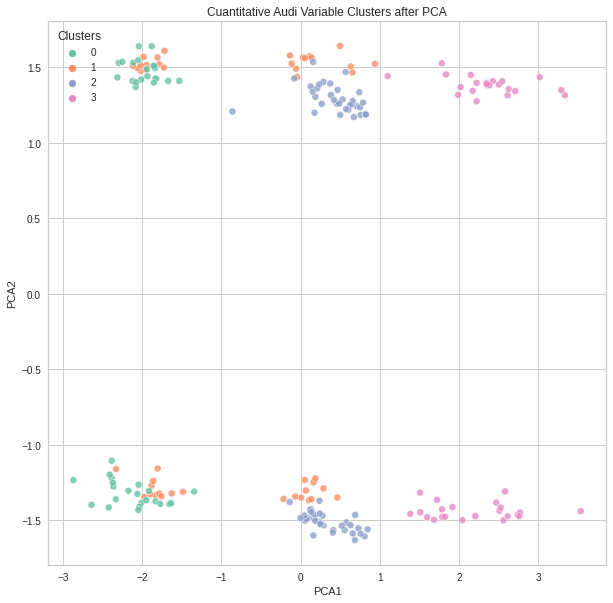

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Cuantitative Audi Variable Clusters after PCA');

In [ ]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df_cluster)

df_pca = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2','PC3'])
df_pca['Clusters'] = predictions
''' df_pca.head() '''

df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       198 non-null    float64
 1   PC2       198 non-null    float64
 2   PC3       198 non-null    float64
 3   Clusters  198 non-null    int32  
dtypes: float64(3), int32(1)
memory usage: 5.5 KB


In [ ]:
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
              color='Clusters')
fig.show()